# Projet Monte-Carlo : social networks

Leena Boyina, Thomas Garnier, Guillaume Lévy

# Sommaire

- Introduction
  - Modélisation élémentaire
  - Du dessin à l'algèbre linéaire
  - L'espace des variables latentes
  - Écriture du problème de maximisation
- Application au cas des familles florentines
  - Installation des packages
  - Construction du maximum de vraisemblance
  - Algorithme de Metropolis-Hastings
  - Visualisation de l'algorithme
  - Extension au cas de la dimension (latente) 3. 

# Introduction

On rappelle que la seule donnée initiale du problème est un graphe fini de relations, noté $G$, qui peuvent être symétriques ou non en général. Les points seront fréquemment des personnes (ou des groupes de personnes) et les arètes, des relations entre les personnes.

Un cas typique est celui des amitiés, à opposer à l'appréciation ou la popularité. Une relation d'amitié sera, on l'espère pour les protagonistes, symétrique : A dit être ami avec B si et seulement si B dit être ami avec A. La même remarque s'applique aux mariages, l'aspect officiel garantissant la symétrie de la relation.

On peut également s'intéresser à la popularité ou la réputation si l'on veut des exemples réalistes de non-symétrie. Une personne peut être très populaire (ou très impopulaire), indépendamment du niveau de popularité des personnes la jugeant.

## Modélisation élémentaire

Un graphe discret est canoniquement associé à une matrice d'adjacence, notée généralement $Y$ dans la suite. Dans toute la suite, on notera $n$ le nombre de sommets de $G$. Ces derniers sont mis en bijection avec les entiers de $[[1,n]]$. 

Si l'on note $y_{i,j}$ le coefficient en position $(i,j)$ de cette matrice, on a
- $y_{i,j}=1$ si $i$ envoie une arète vers $j$, 
- $y_{i,j}=0$ sinon.

Il est clair que $G$ est non orienté si et seulement la matrice $Y$ est symétrique.

## Du dessin à l'algèbre linéaire et vice-versa

Une fois que l'on a la matrice d'adjacence, nombre de caractéristiques du graphe s'en déduisent. Donnons quelques exemples.

- Chemins : la matrice d'adjacence donne tous les chemins (orientés) de longueur $1$ à l'intérieur du graphe, i.e. toutes les relations d'adjacence à l'ordre $1$. Le calcul de $Y^k$ pour $k$ entier positif donne, de manière similaire, le nombre de chemins de longueur $k$ reliant les sommets du graphe. La preuve se fait par récurrence sur $k$ et sera omise ici.

- Connexité : un graphe (orienté) est dit connexe si pour tout couple de sommets $(i,j)$, il existe un chemin de $i$ vers $j$. Remarquons que si le graphe est non orienté, on peut aller de $i$ vers $j$ si et seulement si on peut aller de $j$ vers $i$.

Des deux remarques précédentes, on déduit le fait suivant. La connexité d'un graphe est équivalente à la propriété 

$P$ : "Pour tout couple de sommets $(i,j)$, il existe $k \in \mathbb{N}$ tel que $(Y^k)_{i,j} \neq 0$."

On notera que pour un graphe à $n$ sommets, on peut se restreindre au calcul des $Y^k$ pour $k \in [[1,n-1]]$.

## L'espace des variables latentes

Décrire complètement un graphe *quelconque* de grande taille est une tâche gourmande en ressources. En effet, un graphe à $n$ sommets est représenté par une matrice d'adjacence de format $n \times n$; même avec des hypothèses simplificatrices comme le caractère parcimonieux du graphe et/ou sa non-orientation, l'occupation de la mémoire (de stockage comme de traitement) devient rapidement un problème.

Tout commence par une remarque simple : un graphe *social*, i.e. représentant des liens sociaux entre personnes, doit présenter un grand nombre de corrélations. Les centres d'intérêt, les liens de parenté, le lieu d'habitation ou l'âge sont autant de facteurs permettant de rassembler les sommets en groupes dont la proximité est naturelle. Cette agglomération (*clustering*) par facteurs cachés incite à chercher un espace de basse dimension, dit espace des variables latentes (EVL), dans lequel chaque sommet $i$ du graphe est représenté par un point, noté génériquement $z_i$. 

Une proximité dans l'EVL au sens de la distance qui y est choisie doit indiquer *a minima* une forte probabilité de lien (existance d'une arète) entre les sommets correspondants, voire *implique* l'existence de cette arète en fonction de la modélisation choisie.

## Premières conséquences du modèle

Une telle hypothèse capture d'autant mieux les corrélations entre sommets proches : si $i, j, k$ sont trois sommets, l'observation d'une arète entre $i$ et $j$ ainsi qu'entre $j$ et $k$ laisse penser que $z_j$ est proche à la fois de $z_i$ et $z_k$, donc que $z_i$ et $z_k$ sont proches l'un de l'autre. La probabilité qu'il existe une arète entre $i$ et $k$ est donc forte, du moins dans un tel modèle.

Remarquons également que pour un graphe orienté, l'existence d'un lien purement déterministe entre proximité dans l'EVL et arètes dans le graphe est impossible, par symétrie de la distance. Prendre en compte des liens seulement probabilistes présente donc un réel intérêt pratique.

## Hypothèses de travail

Dans la suite, par souci de simplification, on se restreindra néanmoins au cas symétrique. De même, plutôt que de considérer un espace métrique général (qu'il soit une variété ou non), on se retreindra à un EVL euclidien, en commençant par la dimension $2$. Certaines définitions seront volontairement plus générales que nécesaires pour ces hypothèses, afin de faciliter d'éventuelles extensions de ce travail.

## Quelques définitions

**Définition 1.** Soit $D$ une matrice à coefficients positifs. On dit que $D$ est une matrice de distances si ses coefficients respectent l'inégalité triangulaire suivante : 
$$\forall (i,j,k) : D_{i,j} \leq D_{i,k} + D_{k,j}.$$

**Définition 2.** Soit $(E,d)$ un espace métrique, $n$ un entier naturel, $Z = (z_1,\dots,z_n)$ une collection de points de $E$. La matrice des distances de $Z$, notée $D$ ou $D(Z)$, est définie par
$$D_{i,j} := d(z_i, z_j). $$

On remarque que pour toute collection $Z$, sa matrice des distances $D(Z)$ est une matrice des distances au sens de la définition précédente. La réciproque (étant donnée une matrice de distances $D_0$, trouver un espace métrique $(E,d)$ et une collection de points $Z$ tels que $D_0 = D(Z)$) est trivialement vraie si l'on n'impose aucune restriction sur l'espace métrique $(E,d)$ [1], mais peut devenir fausse si l'on se restreint à chercher un espace *euclidien*, qui plus est de basse dimension. 


[1] Il suffit de prendre pour $E$ l'ensemble des entiers de $[[1,taille(D)]]$ et pour $d$, une distance ad-hoc définie paire de points par paire de points : $\forall 1 \leq  i, j \leq n : d(i,j) := (D_0)_{i,j}$.

Toutefois, on peut parfois se contenter d'une *collection approximante*, par quoi on entend une collection $Z'$ dont la matrice des distances $D(Z')$ est jugée "suffisamment proche" de $D_0$. C'est notamment le cas lorsque l'application qui à une distance associe la présence d'une arète n'est pas déterministe.


**Définition 3.**  Soit $G$ un graphe, de matrice d'adjacence $Y$. Soit $D$ une matrice de distances. On dit que $D$ représente $G$ si

$$ \forall i, j : y_{i,j} = 1 \Rightarrow d_{i,j} > 1 \text{ et } y_{i,j} = 0 \Rightarrow d_{i,j} < 1. $$

Si de plus il existe un espace euclidien $E$ de dimension $k$ et une collection de points $Z \subset E$ telle que $D = D(Z)$, on dit que $G$ est $k$-représentable.

## Structure conditionnelle du modèle

Il est postulé une indépendance relative des arètes, conditionnellement aux positions latentes. Autrement dit, une fois que l'on connaît les positions latentes de tous les sommets, la probabilité qu'une arète existe entre deux sommets $i$ et $j$ donnés ne dépend plus des caractéristiques d'un troisième sommet $k$ quelconque.

Cette indépendance conditionnelle réduit grandement la complexité du modèle. En effet, conditionnellement aux paramètres latents (incluant la collection $Z$, mais également d'autres paramètres notés génériquement $\theta$) on peut écrire

$$\mathbb P (Y | Z, \theta) = \prod_{i,j} \mathbb P(y_{i,j} | Z, \theta).$$

## Cas d'un modèle conditionnellement logistique (MCL)

On peut encore simplifier les expressions ci-dessus en postulant une forme simple des probabilités élémentaires. Notons
$$p_{i,j} := \mathbb P(y_{i,j} | Z, \theta).$$

On supposera désormais dans la suite que l'on a
$$p_{i,j} = \eta_{i,j} y_{i,j} - \ln(1+e^{\eta_{i,j}}).$$
La matrice $\eta$ est définie par
$$\eta := \alpha \mathbb{J}_n - D,$$
avec $\alpha \in \mathbb{R}$ et $D$ une matrice de distances de format $n \times n$. La matrice $\mathbb J_n$ a tous ses coefficients égaux à $1$.

## Cas particulier : les graphes complets

**Définition 4.** Un graphe est dit complet si toutes les arètes possibles existent, i.e. si pour toute paire $i,j$ de sommets, il existe une arète de $i$ vers $j$. En d'autres termes, la matrice d'adjacence est égale, pour $n$ sommets, à $\mathbb J_n$.

Dans un MCL sur un graphe complet, le problème de maximisation de la vraisemblance est mal posé. En effet, la log-vraisemblance s'écrit

$$\ln \mathbb P(\mathbb J_n|\alpha, D) =  \sum_{i \neq j} f(\eta_{i,j}) $$

avec $f(\eta) := \eta - \ln(1+e^{\eta})$.
La fonction $f$ est certes concave, mais monotone, négative et de limite nulle en $+\infty$. Ainsi, la log-vraisemblance n'admet pas de maximum global dans ce cas.

## Cas général

Une fois ce cas particulier exclu, le problème de maximisation de la log-vraisemblance redevient bien posé. En effet, pour un graphe non complet, il existe au moins une paire $(i,j)$ telle que $y_{i,j} = 0$. Rappelons la formule de la dérivée :

$$\frac{1}{\mathbb P(Y|\alpha, D)} \frac{\partial \mathbb P(Y|\alpha, D)}{\partial \alpha} = \sum_{i \neq j} \left(y_{i,j} - \frac{1}{1+e^{D_{i,j} - \alpha}}\right). $$

Cette dérivée est strictement monotone en la variable $\alpha$, les $D_{i,j}$ étant fixés, de limite strictement positive en $-\infty$ et de limite *strictement* négative en $+\infty$ dès lors que $y_{i,j} \not\equiv  1$. À matrice de distances $D$ fixée, il existe donc un unique point de maximum, noté $\alpha_0(D)$. Un premier obstacle à l'existence d'un maximum de vraisemblance a donc été levé.

## Écriture du problème de maximisation

En notans $\star$ le produit tropical matriciel [1], une matrice $D$ est une matrice de distances si et seulement si 
$$D \text{ est une matrice symétrique }, D \geq 0 \text{ et } D \star D - D \geq 0, \qquad (ConDist)$$
l'inégalité entre matrices étant à comprendre coefficient par coefficient.

[1] Cf Wikipédia [en français](https://fr.wikipedia.org/wiki/Math%C3%A9matiques_tropicales#Application_:_calcul_des_distances_dans_un_graphe) ou [en anglais](https://en.wikipedia.org/wiki/Min-plus_matrix_multiplication).

On cherche donc à résoudre le problème

$$\max_{\alpha, D} \ln \mathbb P(Y | \alpha, D) \quad \text{ s.c. } (ConDist).$$

Une fois les paramètres $\alpha, D$ obtenus, on fera usage d'un algorithme de type multi-dimensional scaling (MDS) afin d'en déduire une collection approximante $Z_0 \subset \mathbb R^2$ pour la matrice $D$.

À ce stade, on a enfin construit une première approximation de la configuration optimale. C'est l'étape 1 de l'algorithme décrit en page 1093 de l'article.

NB : Une page pour écrire un problème de max/min sous contrainte [en Python](https://aleksandarhaber.com/solve-constrained-optimization-problems-in-python-by-using-scipy-library-and-minimize-function/).

# Application au cas des familles florentines

Padgett et Ansell (1993) ont compilé des données sur les relations matrimoniales et commerciales entre 16 familles florentines historiquement importantes, en utilisant une histoire de cette période donnée par Kent (1978). Nous analysons les données sur les relations matrimoniales ayant eu lieu au cours du 15e siècle. Les acteurs de la population sont des familles, et un lien existe entre deux familles s'il y a eu au moins un mariage entre elles. Il s'agit d'une relation non dirigée, car les familles respectives du mari et de la femme dans chaque mariage n'ont pas été enregistrées. L'une des 16 familles n'avait aucun lien matrimonial avec les autres et a donc été exclue de l'analyse. Si elle avait été incluse, cette famille aurait eu une distance infinie par rapport aux autres dans une estimation du maximum de vraisemblance et une distance grande mais finie dans une analyse bayésienne, comme déterminé par le prior.

## Installation des packages, modules et jeu de données

### Packages

In [211]:
#!pip install --quiet matplotlib
#!pip install --quiet networkx
#!pip install --quiet numpy
#!pip install --quiet pandas
#!pip install --quiet scipy
#!pip install --quiet sklearn
#!pip install --quiet scikit-learn

### Modules

In [212]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.optimize import minimize
from scipy.stats import multivariate_normal, expon, norm
from scipy.spatial import procrustes
from scipy.linalg import orthogonal_procrustes
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D

### Jeu de données

In [213]:
matrice_florentine = np.loadtxt("ff.m.dat")

# Supression de la famille qui n'est marié à aucune autre famille
zro = np.where(np.dot(matrice_florentine, np.ones(matrice_florentine.shape[1])) == 0)[0]
if len(zro) > 0:
    matrice_florentine = np.delete(matrice_florentine, zro, axis=0)
    matrice_florentine = np.delete(matrice_florentine, zro, axis=1)

## Visualisation du jeu de données

In [214]:
matrice_florentine

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.

On veut commencer par générer une première représentation graphique des liens entre les familles 

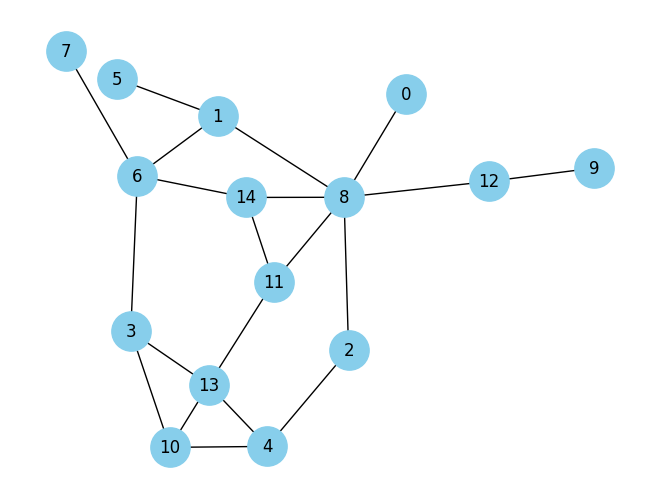

In [215]:
matrice_adjacence = matrice_florentine

# Création d'un nouveau graphe non dirigé

G = nx.Graph()
G.add_nodes_from(range(len(matrice_adjacence)))

for i in range(len(matrice_adjacence)):
    for j in range(len(matrice_adjacence[i])):
        if matrice_adjacence[i][j] == 1:
            G.add_edge(i, j)

nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, font_size=12, font_color='black')

plt.show()


Je présente ici un autre angle de représentation. 

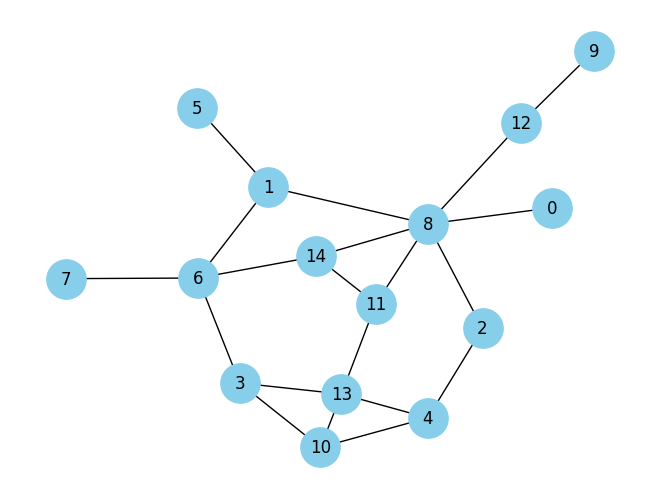

In [216]:
# On calcul les positions des nœuds
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=12, font_color='black')
plt.show()

## Construction du maximum de vraisemblance

On cherche D qui résoud le problème d'optimisation suivant : 
$$ \max_{\alpha, D} \ln \mathbb P(Y | \alpha, D) \quad \text{ s.c. } (ConDist). $$

### Paramètres

In [217]:
n = 15  # Dimension de l'espace
# Initialisation aléatoire symétrique de D
D_initial_guess = np.random.rand(n, n)
D_initial_guess = (D_initial_guess + D_initial_guess.T) / 2  # Initialisation aléatoire de D
alpha = 2
Y = matrice_adjacence

### Fonctions

In [218]:
def objective_function(D_flat):
    """
    Fonction objectif à maximiser, pour trouver les estimateurs du maximum de vraisemblance
    """
    D = D_flat.reshape((n, n))
    etha = alpha * (np.ones((n, n)) - D)
    objective_eq = np.sum([(etha[i, j] * Y[i, j] - np.log(1+np.exp(etha[i, j]))) for i in range(n) for j in range(n) if i != j])
    return -objective_eq


def inequality_constraint(D_flat):
    """
    Création d'une liste de contrainte à respecter, pour trouver les estimateurs du maximum de vraisemblance
    """
    D = D_flat.reshape((n, n))  # Redimensionner D à partir du vecteur D_flat
    constraints = []
    # Inégalité triangulaire : D[i, j] + D[j, k] >= D[i, k] pour tous les triplets i, j, k
    for i in range(n):
        for j in range(n):
            for k in range(n):
                if i != j and j != k and i != k:
                    constraints.append(D[i, j] + D[j, k] - D[i, k])
    
    # Contrainte de symétrie pour D (inégalité dans les deux sens)
    for i in range(n):
        # Les deux contraintes ensemble forcent D à avoir une diagonale nulle
        constraints.append(D[i,i])
        constraints.append(-D[i,i])
        for j in range(i + 1, n):
            constraints.append(D[i, j])  # D[i, j] >= 0
            constraints.append(D[j, i])  # D[j, i] >= 0
            constraints.append(D[i, j] - D[j, i])  # D[i, j] >= D[j, i]
            constraints.append(D[j, i] - D[i, j])  # D[j, i] >= D[i, j]
    
    return np.array(constraints)

### Application

In [219]:
result = minimize(objective_function, D_initial_guess.flatten(), constraints={'type': 'ineq', 'fun': inequality_constraint})

optimal_D_flat = result.x
optimal_D = optimal_D_flat.reshape((n, n))
np.fill_diagonal(optimal_D, 0)

### Affichage

In [220]:
print("Optimal value:", -result.fun)
print("Optimal solution D:")
print(optimal_D)

Optimal value: -36.00869798911414
Optimal solution D:
[[0.         2.1954441  2.18677227 4.1872371  3.20066786 3.02522743
  3.18244727 4.10292036 1.05157876 2.87322802 3.87019767 2.0791523
  2.3317332  3.42293531 2.05408746]
 [2.1954441  0.         2.27905884 2.24071856 3.29295443 0.82978332
  1.01801422 1.9384873  1.14386534 2.96551459 3.00794331 2.17143887
  2.42401977 3.00502035 2.14637403]
 [2.18677227 2.27905884 0.         2.56064689 1.01389559 3.10884216
  3.26606201 4.1865351  1.1351935  2.95684275 1.79342214 2.16276704
  2.41534794 1.7963451  2.13770219]
 [4.1872371  2.24071856 2.56064689 0.         1.5467513  3.07050189
  1.22270435 2.14317743 3.13565833 4.95730759 0.76722475 2.1080848
  4.41581277 0.76430179 2.35106416]
 [3.20066786 3.29295443 1.01389559 1.5467513  0.         4.12273776
  2.76945565 3.68992873 2.1490891  3.97073835 0.77952655 2.12623251
  3.42924353 0.78244951 2.84332632]
 [3.02522743 0.82978332 3.10884216 3.07050189 4.12273776 0.
  1.84779754 2.76827063 1.97

### Construction de la matrice Z_0

In [221]:
k = 2  # On veut un Z de dimension (k, n)
mds = MDS(n_components=k, dissimilarity='precomputed', random_state=42)
Z_0 = mds.fit_transform(optimal_D)
Z_0

array([[ 1.33893569,  1.44366009],
       [-0.43273811,  1.30033626],
       [ 0.97112204, -1.2055074 ],
       [-1.66118279, -1.09867437],
       [-0.06439704, -1.97739922],
       [-0.68716043,  2.2262402 ],
       [-1.36242528,  0.42010303],
       [-2.35643196,  0.77438591],
       [ 0.80735498,  0.3881496 ],
       [ 2.86189148,  0.57489499],
       [-1.02162003, -1.72756876],
       [ 0.11849008, -0.31192739],
       [ 2.26329109,  0.50807883],
       [-0.74377379, -1.52322193],
       [-0.03135593,  0.20845018]])

## Algorithme de Métropolis Hasting

### Fonction de vraisemblance conditionnelle

Je construis la fonction proba pour générer la valeur $$\mathbb P (Y | Z, \theta) = \prod_{i,j} \mathbb P(y_{i,j} | Z, \theta).$$

Pour cela, on construit le logarithme de la probabilité selon la formule 
$$\ln \mathbb P (Y | Z, \theta) =  \sum_{i \neq j} \eta_{i,j} y_{i,j} - \ln(1+e^{\eta_{i,j}}) $$
puis en retourne le resultat qu'on passe à l'exponentielle

In [222]:
def logproba(Z, alpha):
    """
    Évalue la log-vraisemblance du modèle en fonction des paramètres Z, alpha et de la matrice d'adjacence.

    Args:
        Z (numpy.ndarray): Matrice des positions des points.
        alpha (float): Paramètre alpha.
        matrice_adjacence (numpy.ndarray): Matrice d'adjacence du graphe.

    Returns:
        float: La valeur de la log-vraisemblance évaluée pour les paramètres donnés.
    """
    dist_matrix = distance_matrix(Z, Z)  # Calcul de la matrice des distances
    N = alpha * (1 - dist_matrix)

    # Appliquer le masque de la matrice d'adjacence sur N pour exclure les termes i == j
    masked_N = N * (1 - np.eye(N.shape[0])) * matrice_adjacence

    # Calculer P en utilisant des opérations vectorisées
    P = np.sum(masked_N * matrice_adjacence) - np.sum(np.log(1 + np.exp(masked_N)))

    return P



### Fonctions prior

On construit maintenant la fonction pi qui intervient dans l'algorithme d'acceptation rejet selon les réalisation de a loi normale multivariée 0,100 comme indiqué dans l'article pour Z 


Pour une matrice aléatoire $\mathbf{X} = (X_{ij})$ de dimensions $m \times n$, où chaque élément $X_{ij}$ suit une loi normale $\mathcal{N}(0, 100)$, la densité de probabilité jointe de la matrice $\mathbf{X}$ peut être formulée comme suit :

$$ f(\mathbf{X}) = \prod_{i=1}^m \prod_{j=1}^n f(X_{ij}) $$

où $f(X_{ij})$ est la densité de probabilité d'une variable aléatoire $X_{ij}$ suivant une loi normale $\mathcal{N}(0, 100)$. Cette densité de probabilité pour une variable normale est donnée par :

$$ f(x_{ij}) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x_{ij} - \mu)^2}{2\sigma^2}\right) $$

Pour la loi normale $\mathcal{N}(0, 100)$ spécifiée dans votre cas, où $\mu = 0$ (moyenne) et $\sigma = 10$ (écart-type, correspondant à la racine carrée de la variance $100$), la densité de probabilité devient :

$$ f(x_{ij}) = \frac{1}{\sqrt{2\pi \times 100}} \exp\left(-\frac{x_{ij}^2}{2 \times 100}\right) $$

Simplifiant davantage :

$$ f(x_{ij}) = \frac{1}{10\sqrt{2\pi}} \exp\left(-\frac{x_{ij}^2}{200}\right) $$

Ainsi, la densité de probabilité jointe de la matrice $\mathbf{X}$, où chaque élément suit une loi normale $\mathcal{N}(0, 100)$, peut être calculée en multipliant les densités individuelles pour chaque élément :

$$ f(\mathbf{X}) = \prod_{i=1}^m \prod_{j=1}^n \frac{1}{10\sqrt{2\pi}} \exp\left(-\frac{X_{ij}^2}{200}\right) $$



La fonction `norm.pdf(x, loc, scale)` fait partie du module `scipy.stats` et est utilisée pour calculer la densité de probabilité (PDF) d'une variable aléatoire qui suit une distribution normale (gaussienne).

Voici ce que fait chaque paramètre de `norm.pdf` :

- `x` : C'est la valeur (ou les valeurs) pour lesquelles vous souhaitez calculer la densité de probabilité.
  
- `loc` : C'est la moyenne (ou l'espérance) de la distribution normale.

- `scale` : C'est l'écart-type de la distribution normale.

La formule pour la densité de probabilité $f(x)$ d'une variable aléatoire $X$ suivant une distribution normale $\mathcal{N}(\text{loc}, \text{scale}^2) $ est donnée par :

$$ f(x) = \frac{1}{\text{scale} \sqrt{2\pi}} \exp\left(-\frac{(x - \text{loc})^2}{2\text{scale}^2}\right) $$


In [223]:
def pi(Z):
    """
    Évalue la densité d'une loi normale de paramètres (mu, sigma) au point Z.

    Args:
        Z (numpy.ndarray): Vecteur ou matrice de points.

    Returns:
        float: La valeur de la densité évaluée pour les points Z.
    """
    mu = 0
    sigma = 100

    # Utilise la fonction norm.pdf de SciPy pour calculer la densité
    if Z.ndim == 1:
        # Cas d'un vecteur
        value = np.prod(norm.pdf(Z, loc=mu, scale=sigma))
    elif Z.ndim == 2:
        # Cas d'une matrice
        value = np.prod(norm.pdf(Z, loc=mu, scale=sigma), axis=None)  # Calcul sur toute la matrice
    else:
        raise ValueError("Z doit être un vecteur ou une matrice")

    return value


def pi_exponentielle(x):
    """
    Evalue la densité d'une loi exponentiel de paramètre scale, au point x
    """
    scale = 2
    return expon.pdf(x, scale=scale)

In [224]:
Z0=procrustes(Z_0,Z_0)[1]

### Chaine de Markov

A l'aide des fonctions de vraisemblance conditionnelles, prior, et de la fonction procrustes dont on peut trouver la documentation en suivant [ce lien](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.procrustes.html), on programme la chaîne de markov donné par l'article

In [225]:
def markov_chain_Z(z0, n, alpha0, k):
    process_Z = [z0]
    process_interest_Z = [z0]
    alpha = np.full(n + 1, alpha0)  # Préalloue un tableau pour alpha
    taux_acceptation_Z = 0
    taux_acceptation_alpha = 0
    likelihood = np.zeros(n + 1)  # Préalloue un tableau pour likelihood
    likelihood[0]=logproba(z0,alpha0)
    for i in range(n):
        # Pour la matrice Z :
        proposal_Z = process_Z[i] + np.random.normal(0, 1, (15, k))
        seuil = (logproba(proposal_Z, alpha[i]) * pi(proposal_Z)) / (logproba(process_interest_Z[i], alpha[i]) * pi(process_interest_Z[i]))
        if seuil > 1 or np.random.uniform(0, 1) <= seuil:
            process_Z.append(proposal_Z)
            taux_acceptation_Z += 1
        else:
            process_Z.append(process_Z[i])

        Z_star = procrustes(process_Z[i + 1], z0)[1]
        process_interest_Z.append(Z_star)

        # Pour le scalaire alpha
        proposal_alpha = abs(alpha[i] + np.random.normal(0, 1))
        seuil_alpha = (logproba(process_interest_Z[i + 1], proposal_alpha) * pi_exponentielle(proposal_alpha)) / \
                      (logproba(process_interest_Z[i + 1], alpha[i]) * pi_exponentielle(alpha[i]))

        if seuil_alpha > 1 or np.random.uniform(0, 1) <= seuil_alpha:
            alpha[i + 1] = proposal_alpha
            taux_acceptation_alpha += 1
        else:
            alpha[i + 1] = alpha[i]

        likelihood[i + 1] = logproba(process_interest_Z[i + 1], alpha[i + 1])

    taux_acceptation_Z /= n
    taux_acceptation_alpha /= n

    return process_interest_Z, alpha, taux_acceptation_Z, taux_acceptation_alpha, likelihood


### Application

On applique le code à notre distribution aléatoire qu'on a générée

In [226]:
test,test_alpha,ratio_Z,ratio_alpha,likelihood = markov_chain_Z(z0=Z0, alpha0=np.random.exponential(2), n=100000, k=2)

## Visualisation de l'algorithme : 

### Taux d'acceptation

In [227]:
print('Le ratio acceptation de Z est : ', ratio_Z)
print('Le ratio acceptation de alpha est : ', ratio_alpha)

Le ratio acceptation de Z est :  0.04596
Le ratio acceptation de alpha est :  0.81307


### Position de alpha

In [228]:
def plot_values(data_list, variable):
    """
    Crée un graphique pour visualiser les valeurs d'une variable en fonction de son rang dans une liste.

    Args:
        data_list (list or numpy.ndarray): Liste des valeurs de la variable.
        variable (str): Nom de la variable (utilisé pour les étiquettes et le titre du graphique).
    """
    # Création de l'axe des abscisses (rangs dans le vecteur list)
    rangs = range(len(data_list))

    # Tracé du graphique
    plt.figure(figsize=(10, 6))  # Définir la taille du graphique
    plt.plot(rangs, data_list, marker='o', linestyle='-', color='b', label=variable)  # Utiliser variable comme label

    # Ajout des étiquettes et du titre en utilisant variable
    plt.xlabel(f'Rang dans le vecteur de {variable}')  # Utiliser f-string pour inclure variable dans l'étiquette
    plt.ylabel(f'Valeur de {variable}')  # Utiliser f-string pour inclure variable dans l'étiquette
    plt.title(f'Graphique de {variable} en fonction du rang')  # Utiliser f-string pour inclure variable dans le titre
    plt.grid(True)  # Afficher la grille

    # Affichage de la légende
    plt.legend()

    # Affichage du graphique
    plt.show()


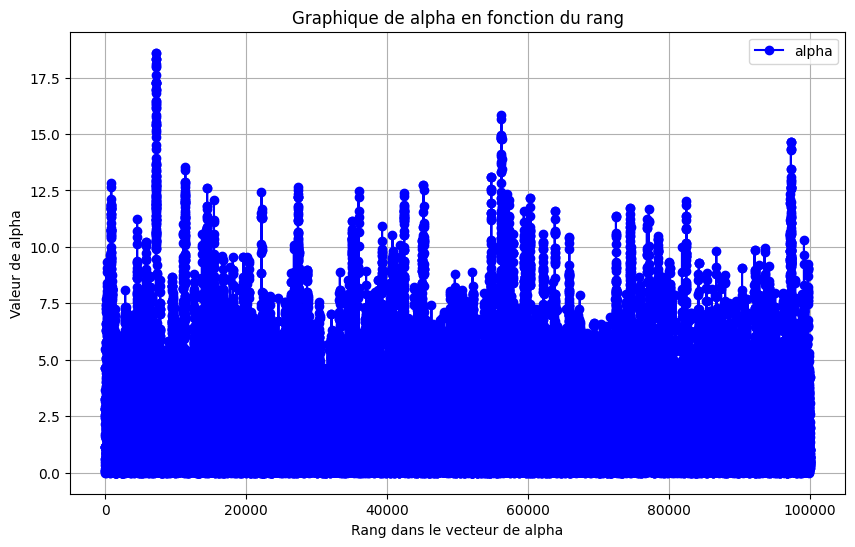

In [229]:
plot_values(test_alpha,'alpha')

In [230]:
def repartition_values(vecteur,variable,iteration_départ):
    # Création du boxplot
    plt.boxplot(vecteur[iteration_départ:])

    # Ajout d'un titre et des labels d'axe
    plt.title(f'Boxplot de {variable}')
    plt.xlabel('Données')
    plt.ylabel('Valeurs')

    # Affichage du boxplot
    plt.show()
    subvector = vecteur[iteration_départ:len(vecteur) + 1]# Extraction de la sous-séquence de valeurs
    # Calcul de la moyenne des valeurs extraites
    moyenne = np.mean(subvector)
    return moyenne

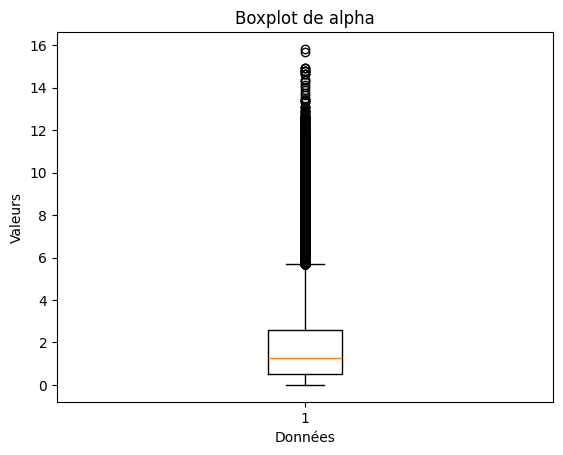

1.8723568483419035

In [231]:
repartition_values(test_alpha,'alpha',10000)

### Matrice Z

#### Trajectoires superposées

In [232]:
def plot_trajectoire(chaine_markov, iteration_depart):
    """
    Trace les trajectoires des points d'une chaîne de Markov sur un graphique.

    Args:
        chaine_markov (list): Liste des états de la chaîne de Markov (liste de vecteurs).
        iteration_depart (int): Indice de départ à partir duquel les trajectoires sont tracées.
    """
    # Extrait les trajectoires à partir de l'itération de départ
    trajectories = np.array(chaine_markov[iteration_depart:])  # Convertit en tableau numpy pour une manipulation plus efficace

    # Détermine le nombre de points (nombre de dimensions par point dans la chaîne)
    num_points = trajectories.shape[1]

    # Prépare le graphique
    plt.figure(figsize=(10, 8))

    # Utilise une palette de couleurs prédéfinie pour une visualisation distincte
    colors = plt.cm.rainbow(np.linspace(0, 1, num_points))

    # Trace les trajectoires sur le graphique avec des couleurs différentes
    for j in range(num_points):  # Boucle sur chaque dimension (point) de la trajectoire
        x_values = trajectories[:, j, 0]  # Extrait les valeurs x pour la dimension j
        y_values = trajectories[:, j, 1]  # Extrait les valeurs y pour la dimension j
        color = colors[j]  # Sélectionne une couleur différente pour chaque trajectoire
        
        # Trace les points de la trajectoire avec une étiquette
        plt.scatter(x_values, y_values, color=color, label=f'Trajectoire {j+1}')
        
    # Ajoute les étiquettes et le titre au graphique
    plt.xlabel('Valeur de convergence x')
    plt.ylabel('Valeur de convergence y')
    plt.title('Représentation des trajectoires sur le même graphique avec couleurs distinctes')
    plt.legend()  # Affiche la légende avec les étiquettes des trajectoires

    # Affiche le graphique
    plt.show()

Exemple quand je plot à partir de la 80000ème itération:

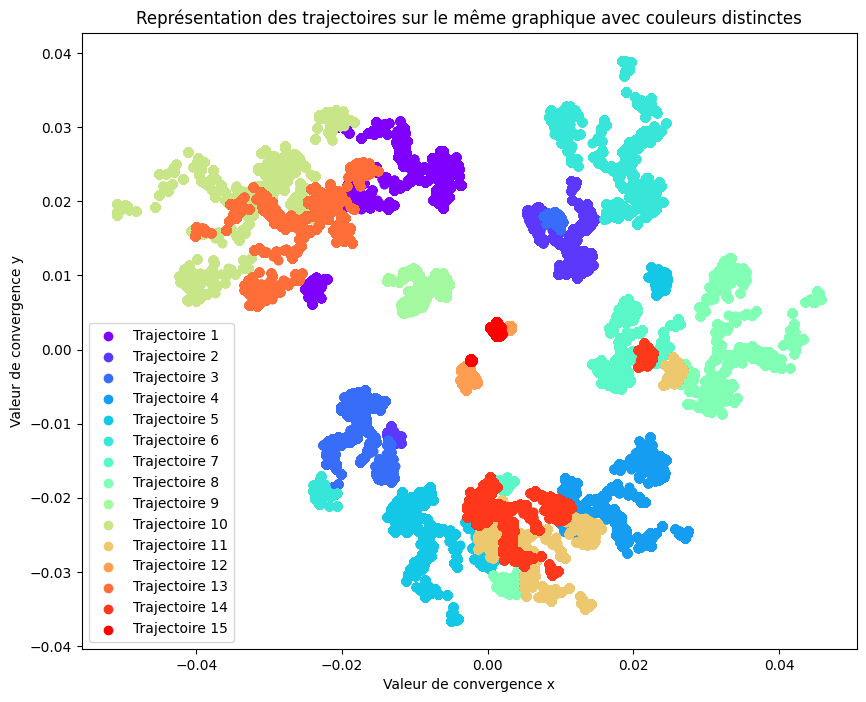

In [233]:
plot_trajectoire(test,50000)

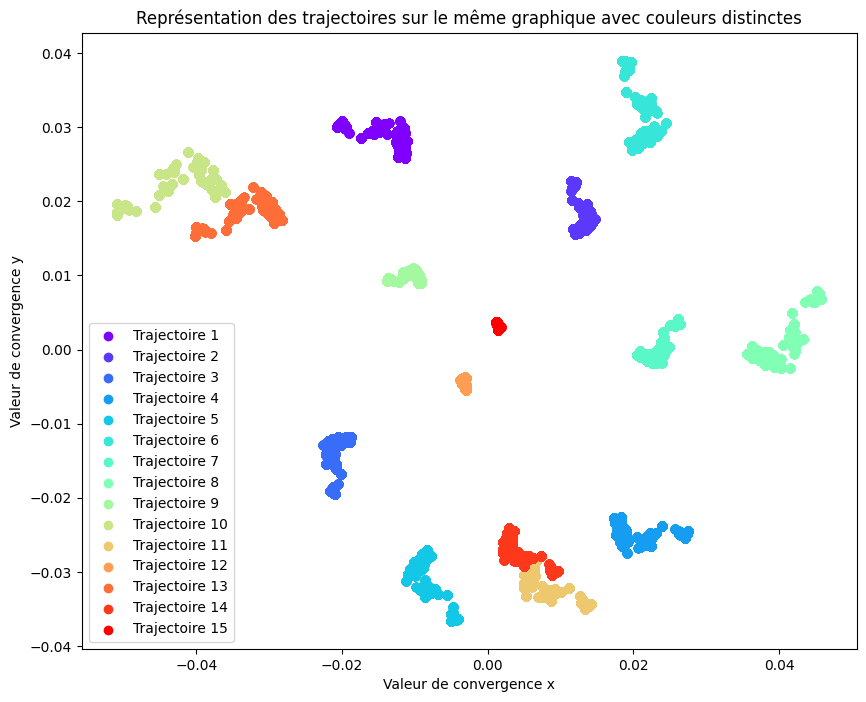

In [234]:
plot_trajectoire(test,90000)

#### Trajectoires individuelles

In [235]:
def plot_trajectoire_indiv(chaine_markov, iteration_départ):
    # Create lists of trajectories for each point
    trajectories = [[] for _ in range(15)]  # Create 15 empty lists for trajectories

    # Populate trajectories lists with coordinates
    for i in range(iteration_départ, len(chaine_markov)):
        for j in range(15):  # Assuming each point has 15 coordinates in chaine_markov
            trajectories[j].append(chaine_markov[i][j])  # Append coordinate to corresponding trajectory list

    # Plot each trajectory on a separate graph
    for j in range(15):  # Loop over each trajectory
        plt.figure(figsize=(8, 6))  # Create a new figure for each trajectory
        x_values = [point[0] for point in trajectories[j]]  # Extract x-coordinates
        y_values = [point[1] for point in trajectories[j]]  # Extract y-coordinates
        
        # Plot points of trajectory
        plt.scatter(x_values, y_values, color='blue', label=f'Trajectoire {j+1}')
        
        # Plot lines connecting points of the trajectory
        plt.plot(x_values, y_values, color='blue', alpha=0.5, linewidth=1)  # Plot lines with specified linewidth

        # Add labels and title to the plot
        plt.xlabel('Valeur de convergence x')
        plt.ylabel('Valeur de convergence y')
        plt.title(f'Trajectoire {j+1}')
        plt.legend()  # Show legend with trajectory label

        # Show the plot
        plt.show()

#### Visualisation 3D de la position en fonction des itérations

In [236]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_trajectoire_3D(chaine_markov, iteration_depart=0):
    """
    Trace les trajectoires en 3D des points d'une chaîne de Markov sur un graphique.

    Args:
        chaine_markov (list): Liste des états de la chaîne de Markov (liste de vecteurs à 3 dimensions).
        iteration_depart (int): Indice de départ à partir duquel les trajectoires sont tracées.
    """
    # Détermine le nombre de points dans chaque état de la chaîne
    num_points = len(chaine_markov[0])

    # Extrait les trajectoires à partir de l'itération de départ
    trajectories = np.array(chaine_markov[iteration_depart:])  # Convertit en tableau numpy pour une manipulation plus efficace

    # Prépare le graphique en 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Utilise une palette de couleurs prédéfinie pour une visualisation distincte
    colors = plt.cm.rainbow(np.linspace(0, 1, num_points))

    # Trace les trajectoires en 3D sur le graphique avec des couleurs différentes
    for j in range(num_points):  # Boucle sur chaque point (dimension) de la trajectoire
        x_values = trajectories[:, j, 0]  # Extrait les valeurs x pour la dimension j
        y_values = trajectories[:, j, 1]  # Extrait les valeurs y pour la dimension j
        z_values = np.arange(iteration_depart, len(chaine_markov))  # Crée une séquence d'itérations comme valeurs z
        color = colors[j]  # Sélectionne une couleur différente pour chaque trajectoire

        # Trace les points de la trajectoire en 3D avec une étiquette
        ax.scatter(x_values, y_values, z_values, color=color, label=f'Trajectoire {j+1}')

        # Trace les lignes reliant les points de la trajectoire en 3D
        ax.plot(x_values, y_values, z_values, color=color, alpha=0.5, linewidth=1)  # Trace les lignes avec une transparence et une largeur spécifiées

    # Ajoute les étiquettes et le titre au graphique en 3D
    ax.set_xlabel('Valeur de convergence x')
    ax.set_ylabel('Valeur de convergence y')
    ax.set_zlabel('Numéro d\'itération')
    plt.title('Représentation des trajectoires en 3D avec couleurs distinctes')
    ax.legend()  # Affiche la légende avec les étiquettes des trajectoires

    # Affiche le graphique en 3D
    plt.show()


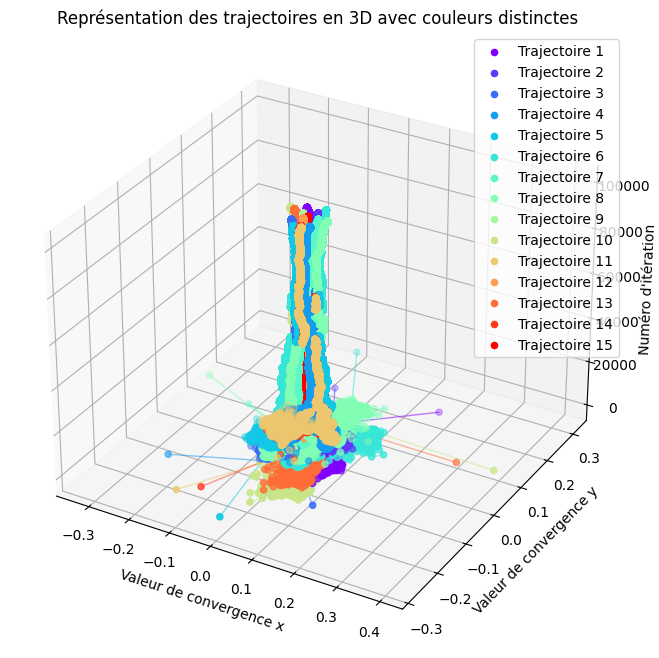

In [237]:
plot_trajectoire_3D(test)

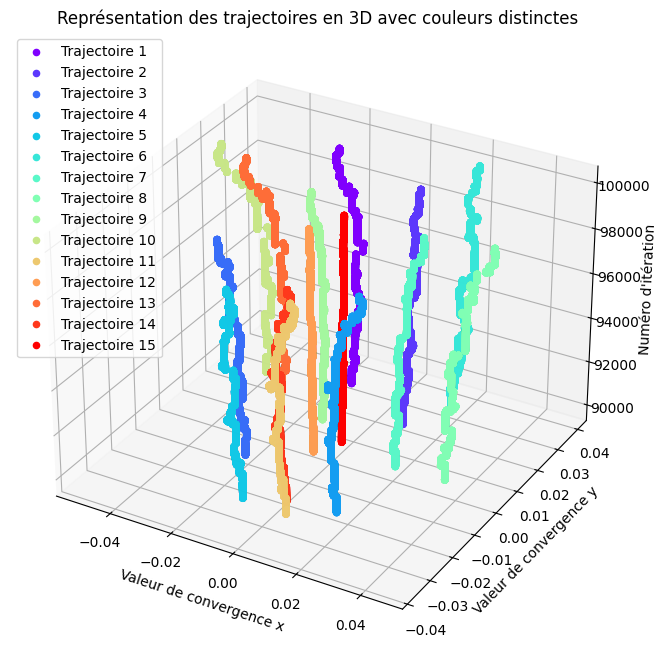

In [238]:
plot_trajectoire_3D(test,90000)

#### Dernière itération de l'algorithme

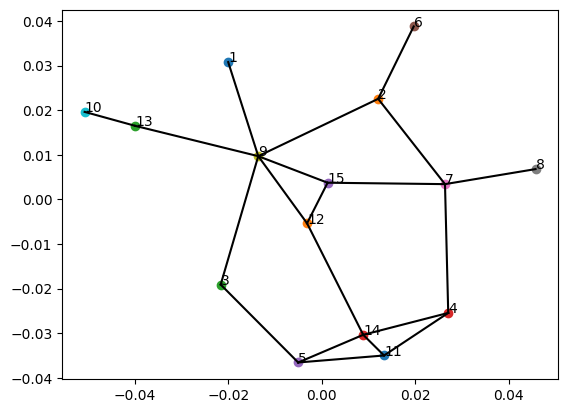

In [239]:
def affichage_dernière_position(chaine_markov):
    last_iteration = chaine_markov[-1]
    for i in range(15):
        plt.scatter(last_iteration[i, 0], last_iteration[i, 1])

    for i in range(15):
        plt.annotate(i+1, (last_iteration[i, 0], last_iteration[i, 1]))  # Ajouter 1 à l'indice du point

    for i in range(15):
        for j in range(i + 1, 15):
            if matrice_adjacence[i, j] == 1:
                plt.plot([last_iteration[i, 0], last_iteration[j, 0]], [last_iteration[i, 1], last_iteration[j, 1]], 'k-')

    # Afficher le graphique
    plt.show()
    plt.close()
    
affichage_dernière_position(test)

Ce graphique ressemble pas mal au graphique Figure 3, (b), dans le papier

#### Vraisemblance

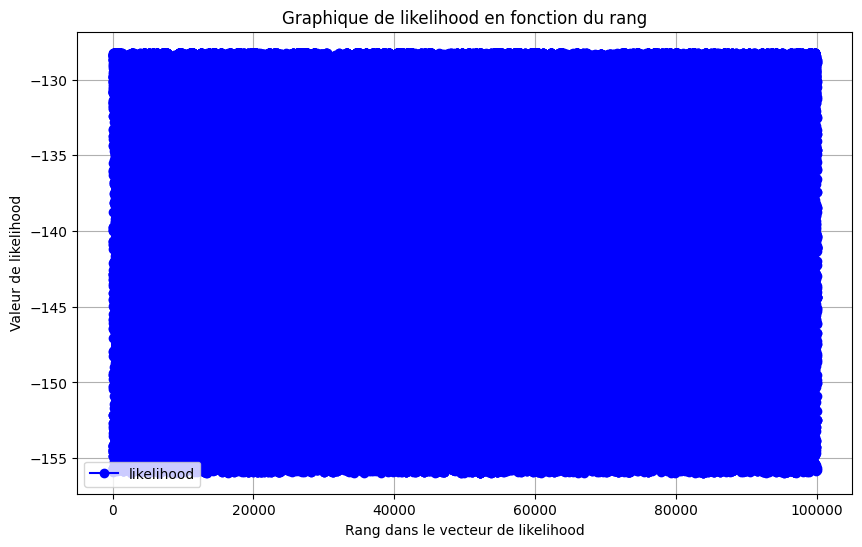

In [240]:
plot_values(likelihood,'likelihood')

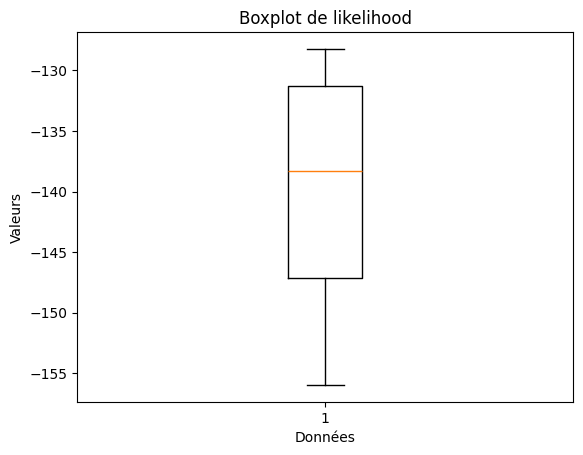

-139.5072808120808

In [241]:
repartition_values(likelihood,'likelihood',10000)

### Tentative pour montrer la convergence de la chaîne de markov 

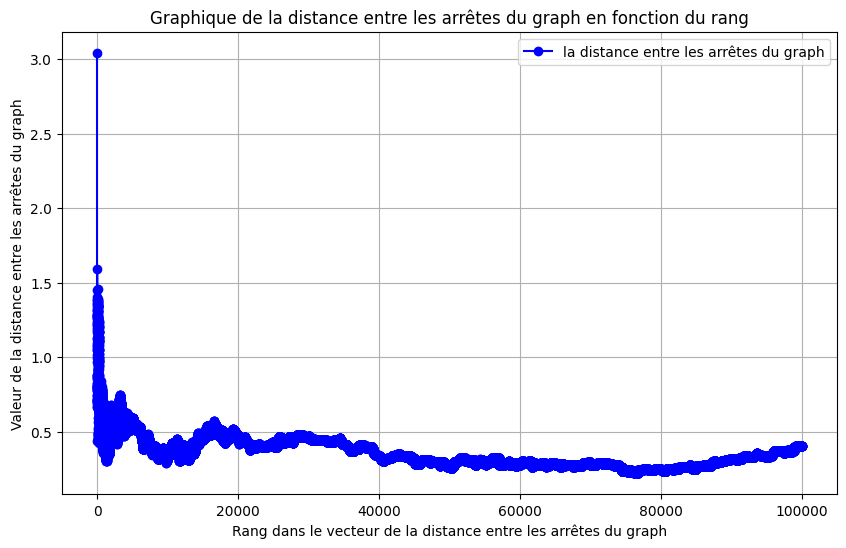

In [242]:
def calculate_total_edge_length(points, adjacency_matrix):
    num_points = len(points)
    total_length = 0.0

    # Parcourir la matrice d'adjacence pour calculer les distances des arêtes
    for i in range(num_points):
        for j in range(i + 1, num_points):
            if adjacency_matrix[i][j] == 1:
                # Calcul de la distance entre les points i et j
                distance = np.linalg.norm(points[j] - points[i])  # Utilisation de la norme euclidienne
                total_length += distance

    return total_length

distance_graph=[]
for i in range (len(test)):
    distance_graph+=[calculate_total_edge_length(test[i],matrice_adjacence)]
    
plot_values(distance_graph,'la distance entre les arrêtes du graph')
    

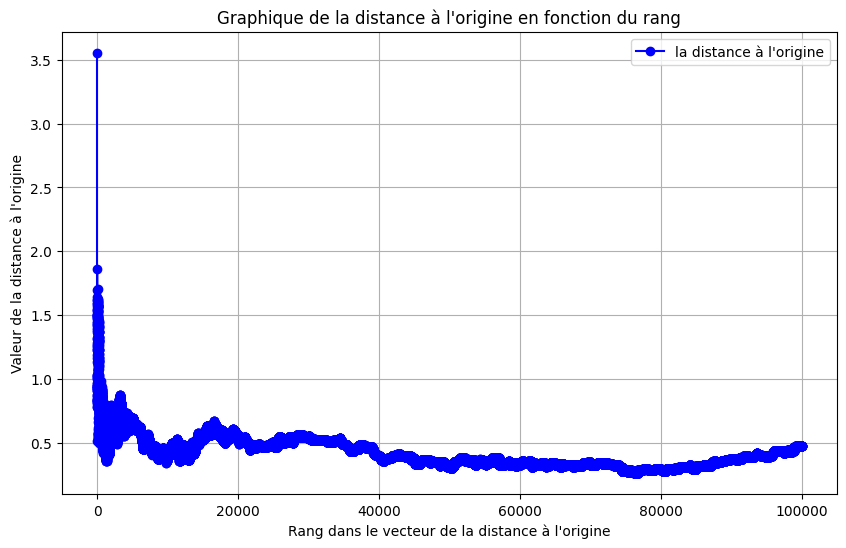

In [243]:
def calculate_distances_to_origin(points):
    """
    Calcule les distances euclidiennes de chaque point par rapport à l'origine (0, 0, ..., 0) dans n'importe quelle dimension.

    Args:
        points (numpy.ndarray): Liste de points. Chaque ligne représente un point avec ses coordonnées.

    Returns:
        numpy.ndarray: Un tableau contenant les distances de chaque point à l'origine.
    """
    # Vérifie la dimension des points
    num_dimensions = points.shape[1]

    # Calcule les distances par rapport à l'origine (0, 0, ..., 0) dans n'importe quelle dimension
    origin = np.zeros(num_dimensions)
    distances = np.linalg.norm(points - origin, axis=1)

    return np.sum(distances)

distance_to_origin=[]
for i in range (len(test)):
    distance_to_origin+=[calculate_distances_to_origin(test[i])]
    
plot_values(distance_to_origin,'la distance à l\'origine')

## Extension au cas de la dimension (latente) 3

### Calcul de la nouvelle matrice optimale

In [244]:
k = 3  # On veut un Z de dimension (k, n)
mds = MDS(n_components=k, dissimilarity='precomputed', random_state=42)
Z_0_2 = mds.fit_transform(optimal_D)
Z_0_2

array([[-0.38443783,  1.46949213,  1.40926408],
       [-1.20316419, -0.31993763,  0.43484123],
       [ 1.1309106 ,  0.68047582,  0.78190878],
       [ 0.89386645, -1.74375643, -0.08216928],
       [ 1.89135912, -0.29500184,  0.36729887],
       [-2.01394096, -0.5881127 ,  0.91931716],
       [-0.57469061, -1.22711721, -0.35185492],
       [-1.0441754 , -1.99192858, -0.98526847],
       [-0.29510115,  0.80475119,  0.21220421],
       [-0.85953403,  2.68206901, -0.62567479],
       [ 1.59566062, -1.16496147, -0.0154547 ],
       [ 0.38719797,  0.24255045, -0.65629974],
       [-0.7467677 ,  2.14922876, -0.32326694],
       [ 1.45425468, -0.82811038, -0.21508572],
       [-0.23143757,  0.13035889, -0.86975977]])

In [245]:
Z0_2=procrustes(Z_0_2,Z_0_2)[1]

### Application de la chaîne de markov

In [246]:
test_2, test_2_alpha, ratio_2_Z, ratio_2_alpha, likelihood_2 = markov_chain_Z(z0=Z0_2, alpha0=np.random.exponential(2), n=10000, k=3)

### Visualisation des résultats

#### Ratio d'acceptation

In [247]:
print('Le ratio acceptation de Z est : ', ratio_2_Z)
print('Le ratio acceptation de alpha est : ', ratio_2_alpha)

Le ratio acceptation de Z est :  0.3493
Le ratio acceptation de alpha est :  0.8137


#### Trajectoire de alpha

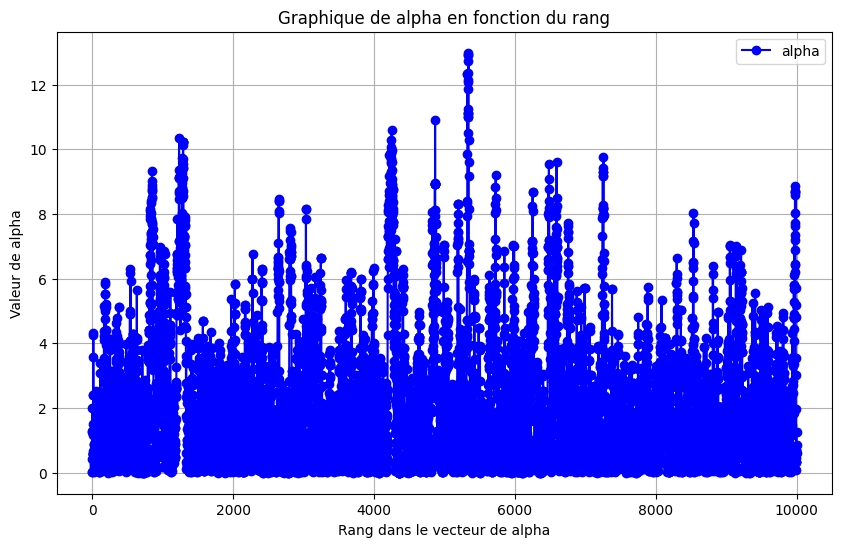

In [248]:
plot_values(test_2_alpha,'alpha')

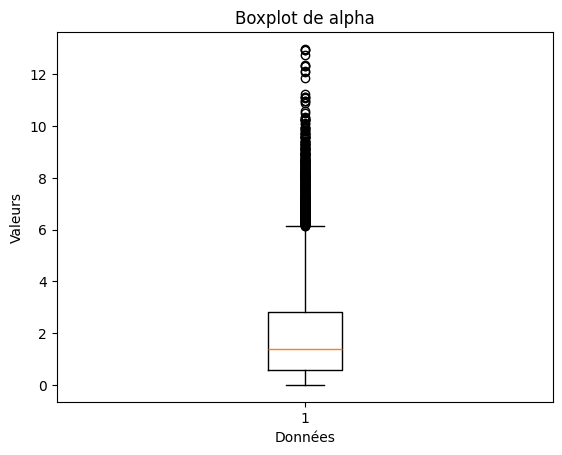

1.9927133912674948

In [249]:
repartition_values(test_2_alpha,'alpha',1000)

#### Trajectoires des points de Z

In [250]:
def plot_trajectoire_indiv_2(chaine_markov, iteration_départ):
    # Create lists of trajectories for each point
    trajectories = [[] for _ in range(15)]  # Create 15 empty lists for trajectories

    # Populate trajectories lists with coordinates
    for i in range(iteration_départ, len(chaine_markov)):
        for j in range(15):  # Assuming each point has 15 coordinates in chaine_markov
            trajectories[j].append(chaine_markov[i][j])  # Append coordinate to corresponding trajectory list

    # Plot each trajectory on a separate graph
    for j in range(15):  # Loop over each trajectory
        plt.figure(figsize=(8, 6))  # Create a new figure for each trajectory
        x_values = [point[0] for point in trajectories[j]]  # Extract x-coordinates
        y_values = [point[1] for point in trajectories[j]]  # Extract y-coordinates
        z_values = [point[2] for point in trajectories[j]]  # Extract z-coordinates
        
        # Plot points of trajectory
        ax = plt.axes(projection='3d')  # Create a 3D axes object
        ax.scatter3D(x_values, y_values, z_values, color='blue', label=f'Trajectoire {j+1}')
        
        # Add labels and title to the plot
        ax.set_xlabel('Valeur de convergence x')
        ax.set_ylabel('Valeur de convergence y')
        ax.set_zlabel('Valeur de convergence z')
        ax.set_title(f'Trajectoire {j+1}')
        ax.legend()  # Show legend with trajectory label

        # Compute average Euclidean distance between consecutive points
        distances = [np.linalg.norm(np.array(trajectories[j][k]) - np.array(trajectories[j][k+1])) for k in range(len(trajectories[j])-1)]
        avg_distance = np.mean(distances)
        convergence_status = "convergent" if avg_distance < 0.01 else "non-convergent"

        # Show convergence status in the title
        ax.set_title(f'Trajectoire {j+1} ({convergence_status})')

        # Show the plot
        plt.show()


#### Dernière itération

In [251]:
def affichage_dernière_position_2(chaine_markov):
    last_iteration = chaine_markov[-1]
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(15):
        ax.scatter(last_iteration[i, 0], last_iteration[i, 1], last_iteration[i, 2])  # Afficher les points en 3D

    for i in range(15):
        ax.text(last_iteration[i, 0], last_iteration[i, 1], last_iteration[i, 2], str(i+1))  # Ajouter les annotations

    for i in range(15):
        for j in range(i + 1, 15):
            if matrice_adjacence[i, j] == 1:
                ax.plot([last_iteration[i, 0], last_iteration[j, 0]], 
                        [last_iteration[i, 1], last_iteration[j, 1]], 
                        [last_iteration[i, 2], last_iteration[j, 2]], 'k-')  # Afficher les lignes entre les points connectés

    # Afficher le graphique
    plt.show()
    plt.close()

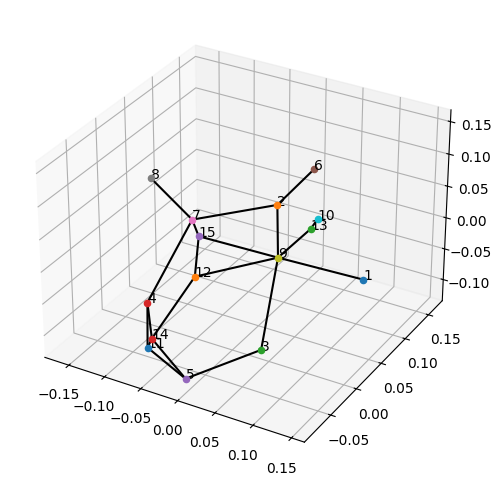

In [252]:
affichage_dernière_position_2(test_2)

#### Vraisemblance 

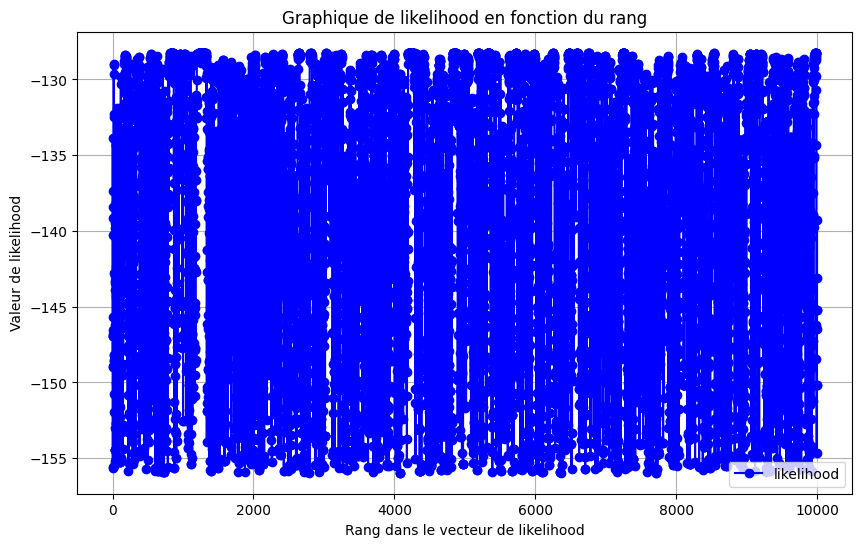

In [253]:
plot_values(likelihood_2,'likelihood')

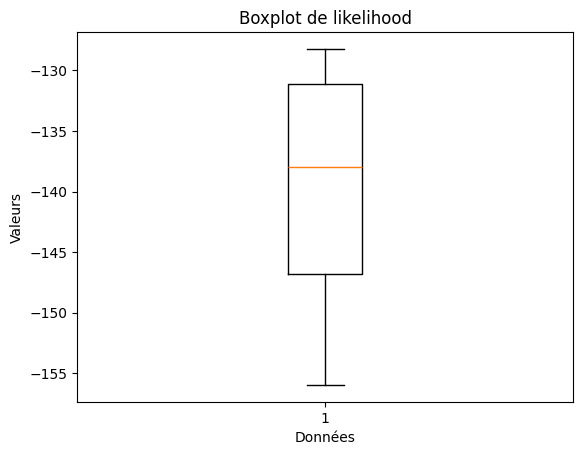

-139.36859565112616

In [254]:
repartition_values(likelihood_2,'likelihood',1000)